In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
# 한글 폰트 적용
from matplotlib import rc
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 확인
fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 폰트 설정, 확인
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']

font_location = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [76]:
# 한국 복지패널 17차 자료(2022) 불러오기

# 원본
welfare_raw = pd.read_spss('./Koweps_hpwc17_2022_beta1.sav')

# 복산본
welfare = welfare_raw.copy()

In [77]:
# 확인
welfare.shape # (16591, 843)
welfare.info()
welfare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16591 entries, 0 to 16590
Columns: 843 entries, h17_id to h17_pers_income5
dtypes: float64(839), object(4)
memory usage: 106.7+ MB


,h17_id,h17_ind,h17_sn,h17_merkey,h_new,h_new1,h17_cobf,p17_wsc,p17_wsl,p17_wgc,...,wc17_63,wc17_64,wc17_5aq4,wc17_5aq5,wc17_5aq6,h17_pers_income1,h17_pers_income2,h17_pers_income3,h17_pers_income4,h17_pers_income5
count,16591.000000,16591.000000,16591.000000,1.659100e+04,16591.000000,16591.000000,166.000000,10140.000000,10140.000000,10140.000000,...,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2938.000000,4197.000000,1147.000000,16591.000000,934.000000
mean,6157.937135,6.818817,1.004822,6.158005e+07,0.626183,0.237358,2.433735,1.000000,1.000000,5103.044906,...,2.961117,3.602686,3.354542,3.994344,3.229056,4613.847515,1498.525852,3178.074978,2.883612,1599.821199
std,3646.361509,6.690917,0.135726,3.646412e+07,0.841924,0.425476,2.025251,0.912506,1.049129,4656.560933,...,2.185179,2.320304,1.034995,0.929995,1.142216,2817.178208,1734.794652,3807.461768,49.028387,4552.854552
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,0.000000,1.000000,0.006721,0.000000,34.298988,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000,-8955.000000,0.000000,-12993.000000
25%,3000.000000,1.000000,1.000000,3.000010e+07,0.000000,0.000000,1.000000,0.334383,0.228336,1706.372073,...,1.000000,2.000000,3.000000,3.000000,2.000000,2820.000000,300.000000,884.000000,0.000000,283.250000
50%,5739.000000,4.000000,1.000000,5.739010e+07,0.000000,0.000000,2.000000,0.739104,0.692788,3771.678762,...,2.000000,3.000000,3.000000,4.000000,3.000000,3938.500000,1070.000000,2363.000000,0.000000,647.000000
75%,9639.000000,16.000000,1.000000,9.639070e+07,1.000000,0.000000,2.000000,1.359835,1.407686,6939.299607,...,5.000000,5.000000,4.000000,5.000000,4.000000,5888.000000,2250.000000,4655.000000,0.000000,1512.250000
max,12011.000000,17.000000,9.000000,1.201117e+08,2.000000,1.000000,7.000000,5.173948,5.742388,26402.890023,...,9.000000,9.000000,6.000000,6.000000,9.000000,43512.000000,64800.000000,44628.000000,4500.000000,106959.000000


In [78]:
# 데이터 분석에 필요한 7개의 변수 확인
# h17_g3      -> 성별
# h17_g4      -> 출생년도
# h17_g10     -> 혼인상태
# h17_g11     -> 종교
# p1702_8aql  -> 월급
# h17_eco9    -> 직종 코드
# h17_reg7    -> 지역 코드

In [79]:
# 843개의 변수 중에서 데이터 분석에 사용할 7개의 변수만 데이터프레임 생성
welfare = welfare[['h17_g3', 'h17_g4', 'h17_g10', 'h17_g11', 'p1702_8aq1', 'h17_eco9', 'h17_reg7']]

# 확인
welfare

,h17_g3,h17_g4,h17_g10,h17_g11,p1702_8aq1,h17_eco9,h17_reg7
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,172.0,942.0,1.0
2,1.0,1942.0,3.0,1.0,100.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,268.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,140.0,399.0,1.0
...,...,...,...,...,...,...,...
16586,1.0,1975.0,1.0,2.0,833.0,222.0,2.0
16587,2.0,1976.0,1.0,2.0,NaN,NaN,2.0
16588,2.0,2009.0,0.0,2.0,NaN,NaN,2.0
16589,1.0,1964.0,1.0,1.0,NaN,248.0,6.0


In [80]:
# 변수명 변경
welfare = welfare.rename(columns={'h17_g3':'성별', 'h17_g4':'출생년도', 'h17_g10':'혼인상테', 'h17_g11':'종교', 'p1702_8aq1':'월급', 'h17_eco9':'직종', 'h17_reg7':'지역'})
welfare

,성별,출생년도,혼인상테,종교,월급,직종,지역
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,172.0,942.0,1.0
2,1.0,1942.0,3.0,1.0,100.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,268.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,140.0,399.0,1.0
...,...,...,...,...,...,...,...
16586,1.0,1975.0,1.0,2.0,833.0,222.0,2.0
16587,2.0,1976.0,1.0,2.0,NaN,NaN,2.0
16588,2.0,2009.0,0.0,2.0,NaN,NaN,2.0
16589,1.0,1964.0,1.0,1.0,NaN,248.0,6.0


In [81]:
welfare.to_csv('welfare.csv') # csv 파일로 저장

In [82]:
# 데이터 확인
welfare.info()
welfare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16591 entries, 0 to 16590
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      16591 non-null  float64
 1   출생년도    16591 non-null  float64
 2   혼인상테    16591 non-null  float64
 3   종교      16591 non-null  float64
 4   월급      5633 non-null   float64
 5   직종      8403 non-null   float64
 6   지역      16591 non-null  float64
dtypes: float64(7)
memory usage: 907.4 KB


,성별,출생년도,혼인상테,종교,월급,직종,지역
count,16591.000000,16591.000000,16591.000000,16591.000000,5633.000000,8403.000000,16591.000000
mean,1.549696,1969.066241,1.795853,1.552709,275.647080,592.390456,3.859562
std,0.497539,24.158054,1.581226,0.497229,214.807673,267.891741,2.039554
min,1.000000,1906.000000,0.000000,1.000000,0.000000,111.000000,1.000000
25%,1.000000,1949.000000,1.000000,1.000000,125.000000,313.000000,2.000000
50%,2.000000,1965.000000,1.000000,2.000000,236.000000,611.000000,3.000000
75%,2.000000,1988.000000,2.000000,2.000000,363.000000,873.000000,6.000000
max,2.000000,2021.000000,6.000000,2.000000,2017.000000,1009.000000,7.000000


In [83]:
# 1. 성별에 따른 월급의 차이
# 변수 검토 및 전처리(성별, 월급)
# 1-1. 성별 변수 확인(결속치, 이상치 확인)
welfare['성별'].dtypes # dtypes('float64')
welfare['성별'].value_counts()
# female    9120
# male      7471rufcmrcl dltkdg

# 1, 2는 정상치, 9(무응답)는 이상치 데이터
welfare['성별'] = np.where(welfare['성별'] == 9, np.nan, welfare['성별'])
welfare

,성별,출생년도,혼인상테,종교,월급,직종,지역
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,172.0,942.0,1.0
2,1.0,1942.0,3.0,1.0,100.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,268.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,140.0,399.0,1.0
...,...,...,...,...,...,...,...
16586,1.0,1975.0,1.0,2.0,833.0,222.0,2.0
16587,2.0,1976.0,1.0,2.0,NaN,NaN,2.0
16588,2.0,2009.0,0.0,2.0,NaN,NaN,2.0
16589,1.0,1964.0,1.0,1.0,NaN,248.0,6.0


In [84]:
# 결측치 확인, 무응답: 9
welfare['성별'].isna().sum() # 0

0

In [85]:
welfare = pd.read_csv('welfare.csv')
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종,지역
0,0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1,1.0,1948.0,2.0,2.0,172.0,942.0,1.0
2,2,1.0,1942.0,3.0,1.0,100.0,762.0,1.0
3,3,1.0,1962.0,1.0,1.0,268.0,855.0,1.0
4,4,2.0,1963.0,1.0,1.0,140.0,399.0,1.0
...,...,...,...,...,...,...,...,...
16586,16586,1.0,1975.0,1.0,2.0,833.0,222.0,2.0
16587,16587,2.0,1976.0,1.0,2.0,NaN,NaN,2.0
16588,16588,2.0,2009.0,0.0,2.0,NaN,NaN,2.0
16589,16589,1.0,1964.0,1.0,1.0,NaN,248.0,6.0


In [86]:
# 성별의 값을 변경, 1.0 -> 남자, 2.0 -> 여자
welfare['성별'] = np.where(welfare['성별'] == 1.0, '남성', '여성')
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종,지역
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0
...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0


In [87]:
# 성별의 빈도 파악 
# 여성(female) 9120, 남성(male) 7471
welfare['성별'].value_counts()

성별
여성    9120
남성    7471
Name: count, dtype: int64

In [88]:
# 1-2) 월급 변수 확인(결측치, 이상치 확인)
welfare['월급'].dtype # dtypes('float64')

# 결측치 아닌값의 개수: 5633
# 월급의 범위: 0 ~ 2017, 평균: 275(만원), 중앙값: 236(만원)
welfare['월급'].describe()

count    5633.000000
mean      275.647080
std       214.807673
min         0.000000
25%       125.000000
50%       236.000000
75%       363.000000
max      2017.000000
Name: 월급, dtype: float64

<Axes: xlabel='월급', ylabel='Count'>

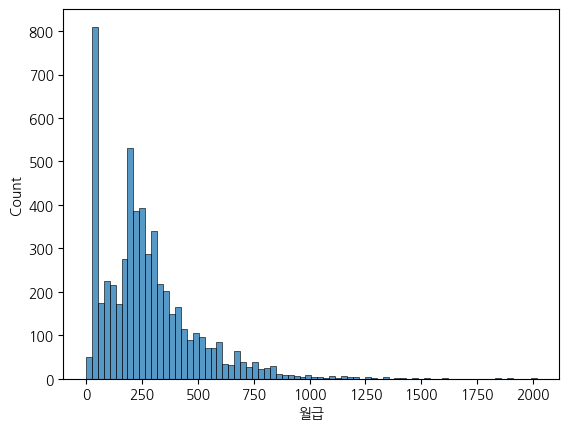

In [89]:
# 월급 분포
sns.histplot(data=welfare, x='월급')

In [90]:
# 결측치 확인, 9999: 무응답
welfare['월급'].isna().sum() # 10958

# 이상치 처리, 무응답: 9999
welfare['월급'] = np.where(welfare['월급']==9999, np.nan, welfare['월급'])

In [91]:
# 결측치 확인
welfare['월급'].isna().sum() # 10958

10958

In [92]:
# 2) 분석표(통계요약표)
gender_income = welfare.dropna(subset=['월급']) \
                        .groupby('성별', as_index=False) \
                        .agg(평균월급=('월급', 'mean'))
# female: 190만원, male: 365만원
gender_income

,성별,평균월급
0,남성,365.106375
1,여성,190.617382


<Axes: xlabel='성별', ylabel='평균월급'>

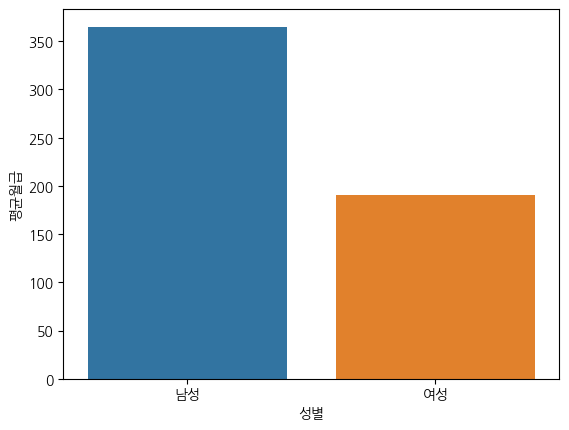

In [93]:
# 3) 막대 그래프 시각화
sns.barplot(data=gender_income, x='성별', y='평균월급')

In [94]:
# 4) 분석 결과
# 남성은 평균 365만원, 여성은 평균 191만원의 월급을 받고, 남성이 여성에 비해 거의 두 배 가까운 월급을 받고 있음을 알 수 있다

In [95]:
welfare.to_csv('welfare_01.csv') # csv 파일로 저장

In [96]:
welfare = pd.read_csv('welfare_01.csv')
welfare

,Unnamed: 0.1,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종,지역
0,0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0
1,1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0
2,2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0
3,3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0
4,4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0
...,...,...,...,...,...,...,...,...,...
16586,16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0
16587,16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0
16588,16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0
16589,16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0
